<h1 align="center"> OUASS TAOUFIK </h1>

<h2 align="center"> Segmentation des clients à l'aide de  l'algorithme K-means clustering  en Python. </h2>


Dans le monde concurrentiel d'aujourd'hui, il est crucial de comprendre le comportement des clients et de les catégoriser en fonction de leur démographie et de leur comportement d'achat. Il s'agit d'un aspect essentiel de la segmentation de la clientèle qui permet aux spécialistes du marketing de mieux adapter leurs efforts à divers sous-ensembles d'audience en termes de stratégies de promotion, de marketing et de développement de produits.


Mesures à prendre pour résoudre ce problème :
1. Importation de bibliothèques.
2. Exploration des données.
3. Visualisation des données.
4. Clustering à l'aide de K-Means.

**<font size="4">1. Importation de bibliothèques.</font>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.cluster import KMeans

**<font size="4">2. Exploration des données.</font>**

In [2]:
data = pd.read_csv('../input/Mall_Customers.csv')

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
uniq = data.CustomerID.unique()
len(uniq)

200

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**<font size="4">3.  Visualisation des données.</font>**

In [8]:
data[['Gender','CustomerID']].groupby('Gender').count()

,CustomerID
Gender,
Female,112
Male,88


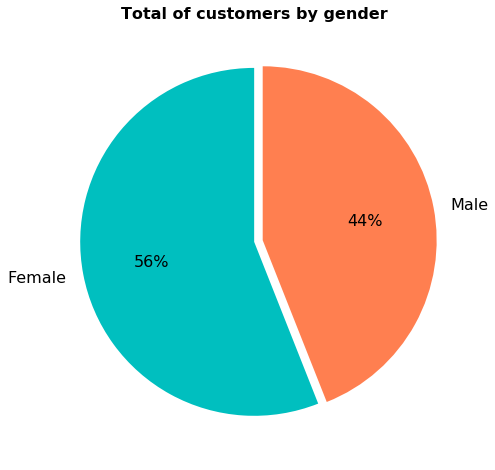

In [9]:
gender = data['Gender'].value_counts()
labels = ['Female', 'Male']
colors = ['c', 'coral']
explode = [0, 0.05]

plt.figure(figsize=(8,8))
plt.title('Total of customers by gender', fontsize = 16, fontweight='bold') 
plt.pie(gender, colors = colors, autopct = '%1.0f%%', labels = labels, explode = explode, startangle=90, textprops={'fontsize': 16})
plt.savefig('Total of customers by gender.png', bbox_inches = 'tight')
plt.show()

In [10]:
gender_spending = data[['CustomerID', 'Spending Score (1-100)','Gender']].groupby('Gender').mean()
gender_spending

,CustomerID,Spending Score (1-100)
Gender,,
Female,97.562500,51.526786
Male,104.238636,48.511364


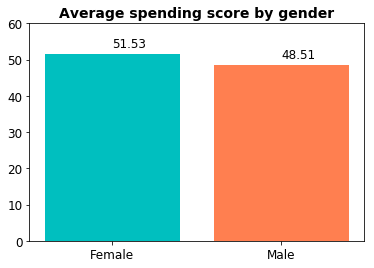

In [11]:
values = gender_spending['Spending Score (1-100)'].values
genders = ['Female', 'Male']

plt.title('Average spending score by gender', fontsize = 14, fontweight='bold')
plt.bar(genders[0], values[0], color = 'c')
plt.bar(genders[1], values[1], color = 'coral')
plt.yticks(np.arange(0, max(values)+10, 10), fontsize = 12)
plt.xticks(fontsize = 12)
for i in range(len(values)):
    plt.text(x = genders[i], y = values[i] + 2, s = round(values[i],2), size = 12)
plt.savefig('Average spending score by gender.png')
plt.show()    

In [12]:
ages = data[['Age']].describe()
ages

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


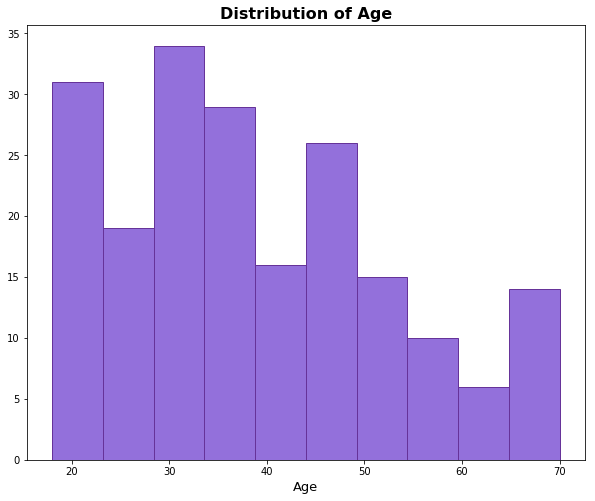

In [13]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Age', fontsize = 16, fontweight='bold')
plt.hist(data['Age'], color = 'mediumpurple', edgecolor = 'rebeccapurple')
plt.xlabel('Age', fontsize = 13)
plt.savefig('Distribution of Age.png', bbox_inches = 'tight')
plt.grid(False)

In [14]:
income = data[['Annual Income (k$)']].describe()
income

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


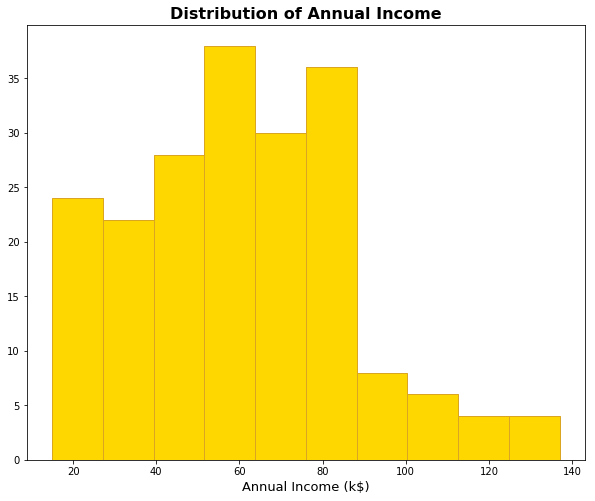

In [15]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Annual Income', fontsize = 16, fontweight='bold')
plt.hist(data['Annual Income (k$)'], color = 'gold', edgecolor = 'goldenrod')
plt.xlabel('Annual Income (k$)', fontsize = 13)
plt.savefig('Distribution of Annual Income.png', bbox_inches = 'tight')
plt.grid(False)

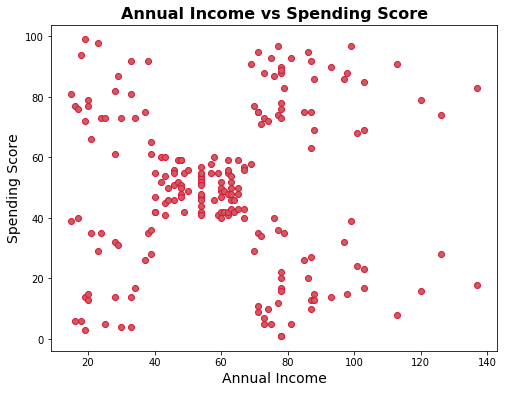

In [18]:
plt.figure(figsize=(8,6))
plt.title('Annual Income vs Spending Score', fontsize = 16, fontweight='bold')  
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color = 'indianred', edgecolors = 'crimson')
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)
plt.savefig('Annual Income vs Spending Score.png', bbox_inches = 'tight')
plt.show()

**<font size="4">4. Clustering à l'aide de K-Means.</font>**

Le clustering consiste à regrouper un ensemble d'objets de telle sorte que les éléments d'un même cluster soient plus similaires les uns aux autres que les éléments d'autres clusters. La similarité est une métrique qui reflète la force de la relation entre deux éléments de données.

L'algorithme K-Means, est un algorithme d'apprentissage non supervisé qui regroupe les données. Cet algorithme nécessite que le nombre de clusters soit spécifié.

**<font size="3">Segmentation en fonction du revenu annuel et du score de dépenses</font>**

Dans ce cas, il est facile de visualiser le nombre de clusters que nous devrions choisir (k = 5), mais ce n'est pas toujours le cas, surtout lorsque nous travaillons avec un ensemble de données de plus grande dimension qui ne peut être visualisé.


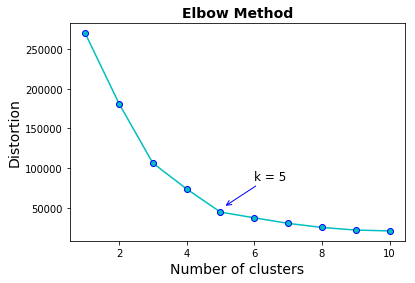

In [20]:
# calculate distortion for a range of number of cluster
X = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.title('Elbow Method', fontsize = 14, fontweight='bold')
plt.plot(range(1, 11), distortions, 'c', marker='o', markeredgecolor = 'b')
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Distortion', fontsize = 14)
plt.annotate('k = 5', xy=(5.1, 51000), xytext=(6, 85000),fontsize = 12, arrowprops={'arrowstyle': '->', 'color': 'blue'})
plt.savefig('Elbow Method.png', bbox_inches = 'tight')
plt.show()

Now let's execute K-means algorithm with 5 clusters and see the output graph.

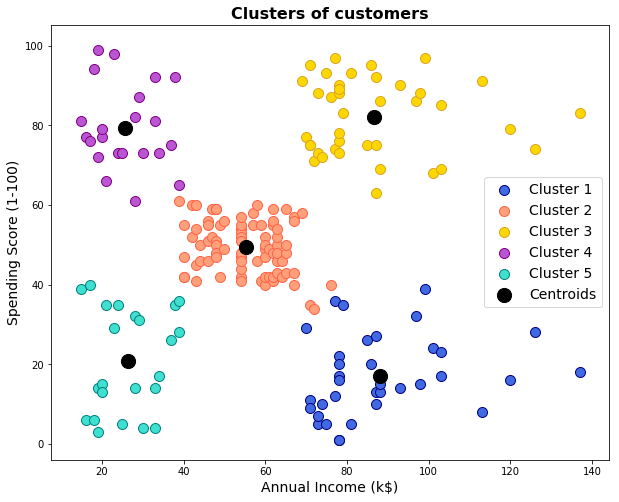

In [21]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'royalblue', edgecolors = 'navy', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightsalmon', edgecolors = 'tomato', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'gold', edgecolors = 'goldenrod', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'mediumorchid', edgecolors = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'turquoise', edgecolors = 'teal', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers', fontsize = 16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize = 14)
plt.ylabel('Spending Score (1-100)', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('Clusters of customers.png', bbox_inches = 'tight')
plt.show()

We obteined 5 clusters, each identified with different colors, while the centroids are in black. Now let's examine each cluster.